<h1>Jacobi vs Conjugate Gradient</h1>

Lets consider solving the discretized 2D Poisson equation with iterative methods. 

In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as pt

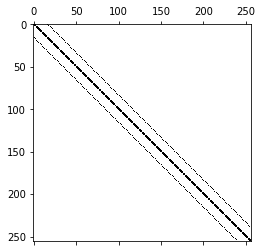

In [2]:
n=16
T = 2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)
A = np.kron(np.eye(n),T)+np.kron(T,np.eye(n))
pt.spy(A)

Define a right-hand side and solve the resulting system directly.

In [3]:
h = 1/(n-1)
b = h*np.arange(0,n*n)
x = la.solve(A,b)

Split the matrix into its diagonal and strictly lower/upper triangular parts.

In [4]:
d = np.diag(A)
D = np.diag(d)
L = np.tril(A,-1)
U = np.triu(A,1)
la.norm(A-(D+L+U))

0.0

Jacobi iteration proceeds using 
$$\boldsymbol x^{(i+1)} = \boldsymbol D^{-1}(\boldsymbol b- (\boldsymbol L+\boldsymbol U)\boldsymbol x^{(i)}).$$

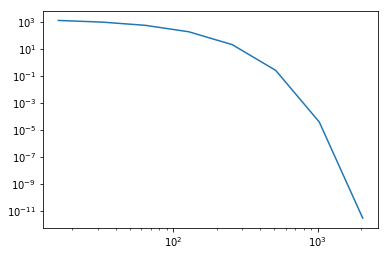

In [10]:
def jacobi(niter,x0):
    xi = x0
    for i in range(niter):
        xi = np.diag(1./d)@(b-(L+U)@xi)
    return xi

niters = np.asarray(2**np.arange(4,12),dtype=int)

x0 = np.random.random(n*n)

jacobi_results = []
err = []

for niter in niters:
    jacobi_results.append(jacobi(niter,x0.copy()))
    err.append(la.norm(jacobi_results[-1]-x))

pt.plot(niters,err)
pt.yscale('log')
pt.xscale('log')

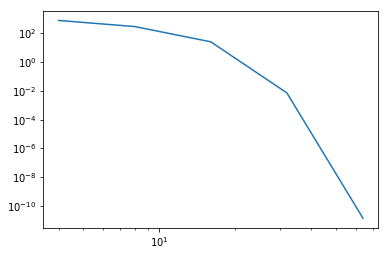

In [16]:
def cg(A,b,niter,x0):
    rk = b - A @ x0
    sk = rk
    xk = x0
    for i in range(niter):
        alpha = np.inner(rk,rk)/np.inner(sk, A @ sk)
        xk1 = xk + alpha * sk
        rk1 = rk - alpha * A @ sk
        beta = np.inner(rk1,rk1)/np.inner(rk,rk)
        sk1 = rk1 + beta*sk
        rk = rk1
        xk = xk1
        sk = sk1
    return xk

iters = np.asarray(2**np.arange(2,7),dtype=int)

x0 = np.random.random(n*n)

cg_results = []
err = []

for niter in iters:
    cg_results.append(cg(A,b,niter,x0.copy()))
    err.append(la.norm(cg_results[-1]-x))

pt.plot(iters,err)
pt.yscale('log')
pt.xscale('log')